In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy.stats import chi2_contingency
from scipy.stats import zscore

# Análise Exploratória 

In [2]:
dados = pd.read_csv("C:/Projetos Pessoais/DataScience/analise_Previsao_Churn_teleComunicacoes/dados/dataSet_TeleComunicacoes_brutos.csv")

In [3]:
dados.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
999,3234-VKACU,Male,0,No,No,2,Yes,No,DSL,No,...,No,Yes,Yes,Yes,Month-to-month,No,Electronic check,70.30,132.4,No
6583,9617-UDPEU,Female,0,No,No,22,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.25,412.55,No
31,4929-XIHVW,Male,1,Yes,No,2,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),95.50,181.65,No
4317,5808-TOTXO,Female,0,No,Yes,3,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Credit card (automatic),20.55,57.4,No
3198,8564-LDKFL,Male,0,Yes,No,40,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),106.00,4178.65,No
6756,1754-GKYPY,Male,1,Yes,No,22,Yes,No,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),89.75,1938.9,No
403,3067-SVMTC,Female,0,Yes,No,68,Yes,No,DSL,Yes,...,No,Yes,No,No,One year,No,Bank transfer (automatic),55.90,3848.8,No
1805,7860-KSUGX,Male,0,Yes,Yes,72,Yes,Yes,DSL,Yes,...,Yes,No,No,No,Two year,No,Credit card (automatic),64.45,4720,No
1028,8436-BJUMM,Male,0,Yes,Yes,26,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,83.75,2070.6,Yes
3987,7625-XCQRH,Female,0,No,No,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,76.50,837.95,Yes


In [4]:
dados.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
dados.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
# Convertendo 'TotalCharges' para float
dados['TotalCharges'] = dados['TotalCharges'].replace('', pd.NA)
dados['TotalCharges'] = pd.to_numeric(dados['TotalCharges'], errors='coerce')

In [8]:
dados.TotalCharges.dtype

dtype('float64')

In [9]:
# Mudando type de 'SeniorCitizen' para tipo object pois é categórica
dados['SeniorCitizen'] = dados['SeniorCitizen'].astype(str)
dados.SeniorCitizen.dtype

dtype('O')

In [11]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [12]:
dados.dtypes

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [13]:
# Separação de colunas numéricas e categóricas e variável target

cats = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

nums = ['tenure','MonthlyCharges','TotalCharges']

target = ['Churn']

## Explorando Variáveis numéricas

In [14]:
dados[cats].describe()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4
top,Male,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
freq,3555,5901,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365


In [15]:
dados[nums].corr()

,tenure,MonthlyCharges,TotalCharges
tenure,1.00000,0.247900,0.825880
MonthlyCharges,0.24790,1.000000,0.651065
TotalCharges,0.82588,0.651065,1.000000


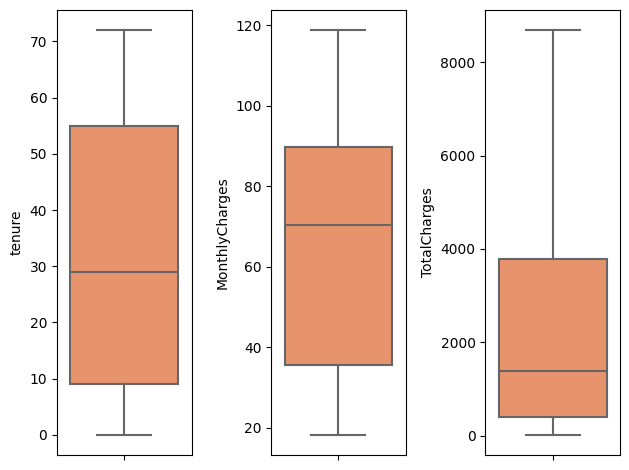

In [17]:
features = nums
for i in range(0, len(features)):
    plt.subplot(1, len(features), i + 1)
    sns.boxplot(y = dados[features[i]], palette = 'OrRd', orient = 'v')
    plt.tight_layout()

## Explorando Variáveis Categóricas

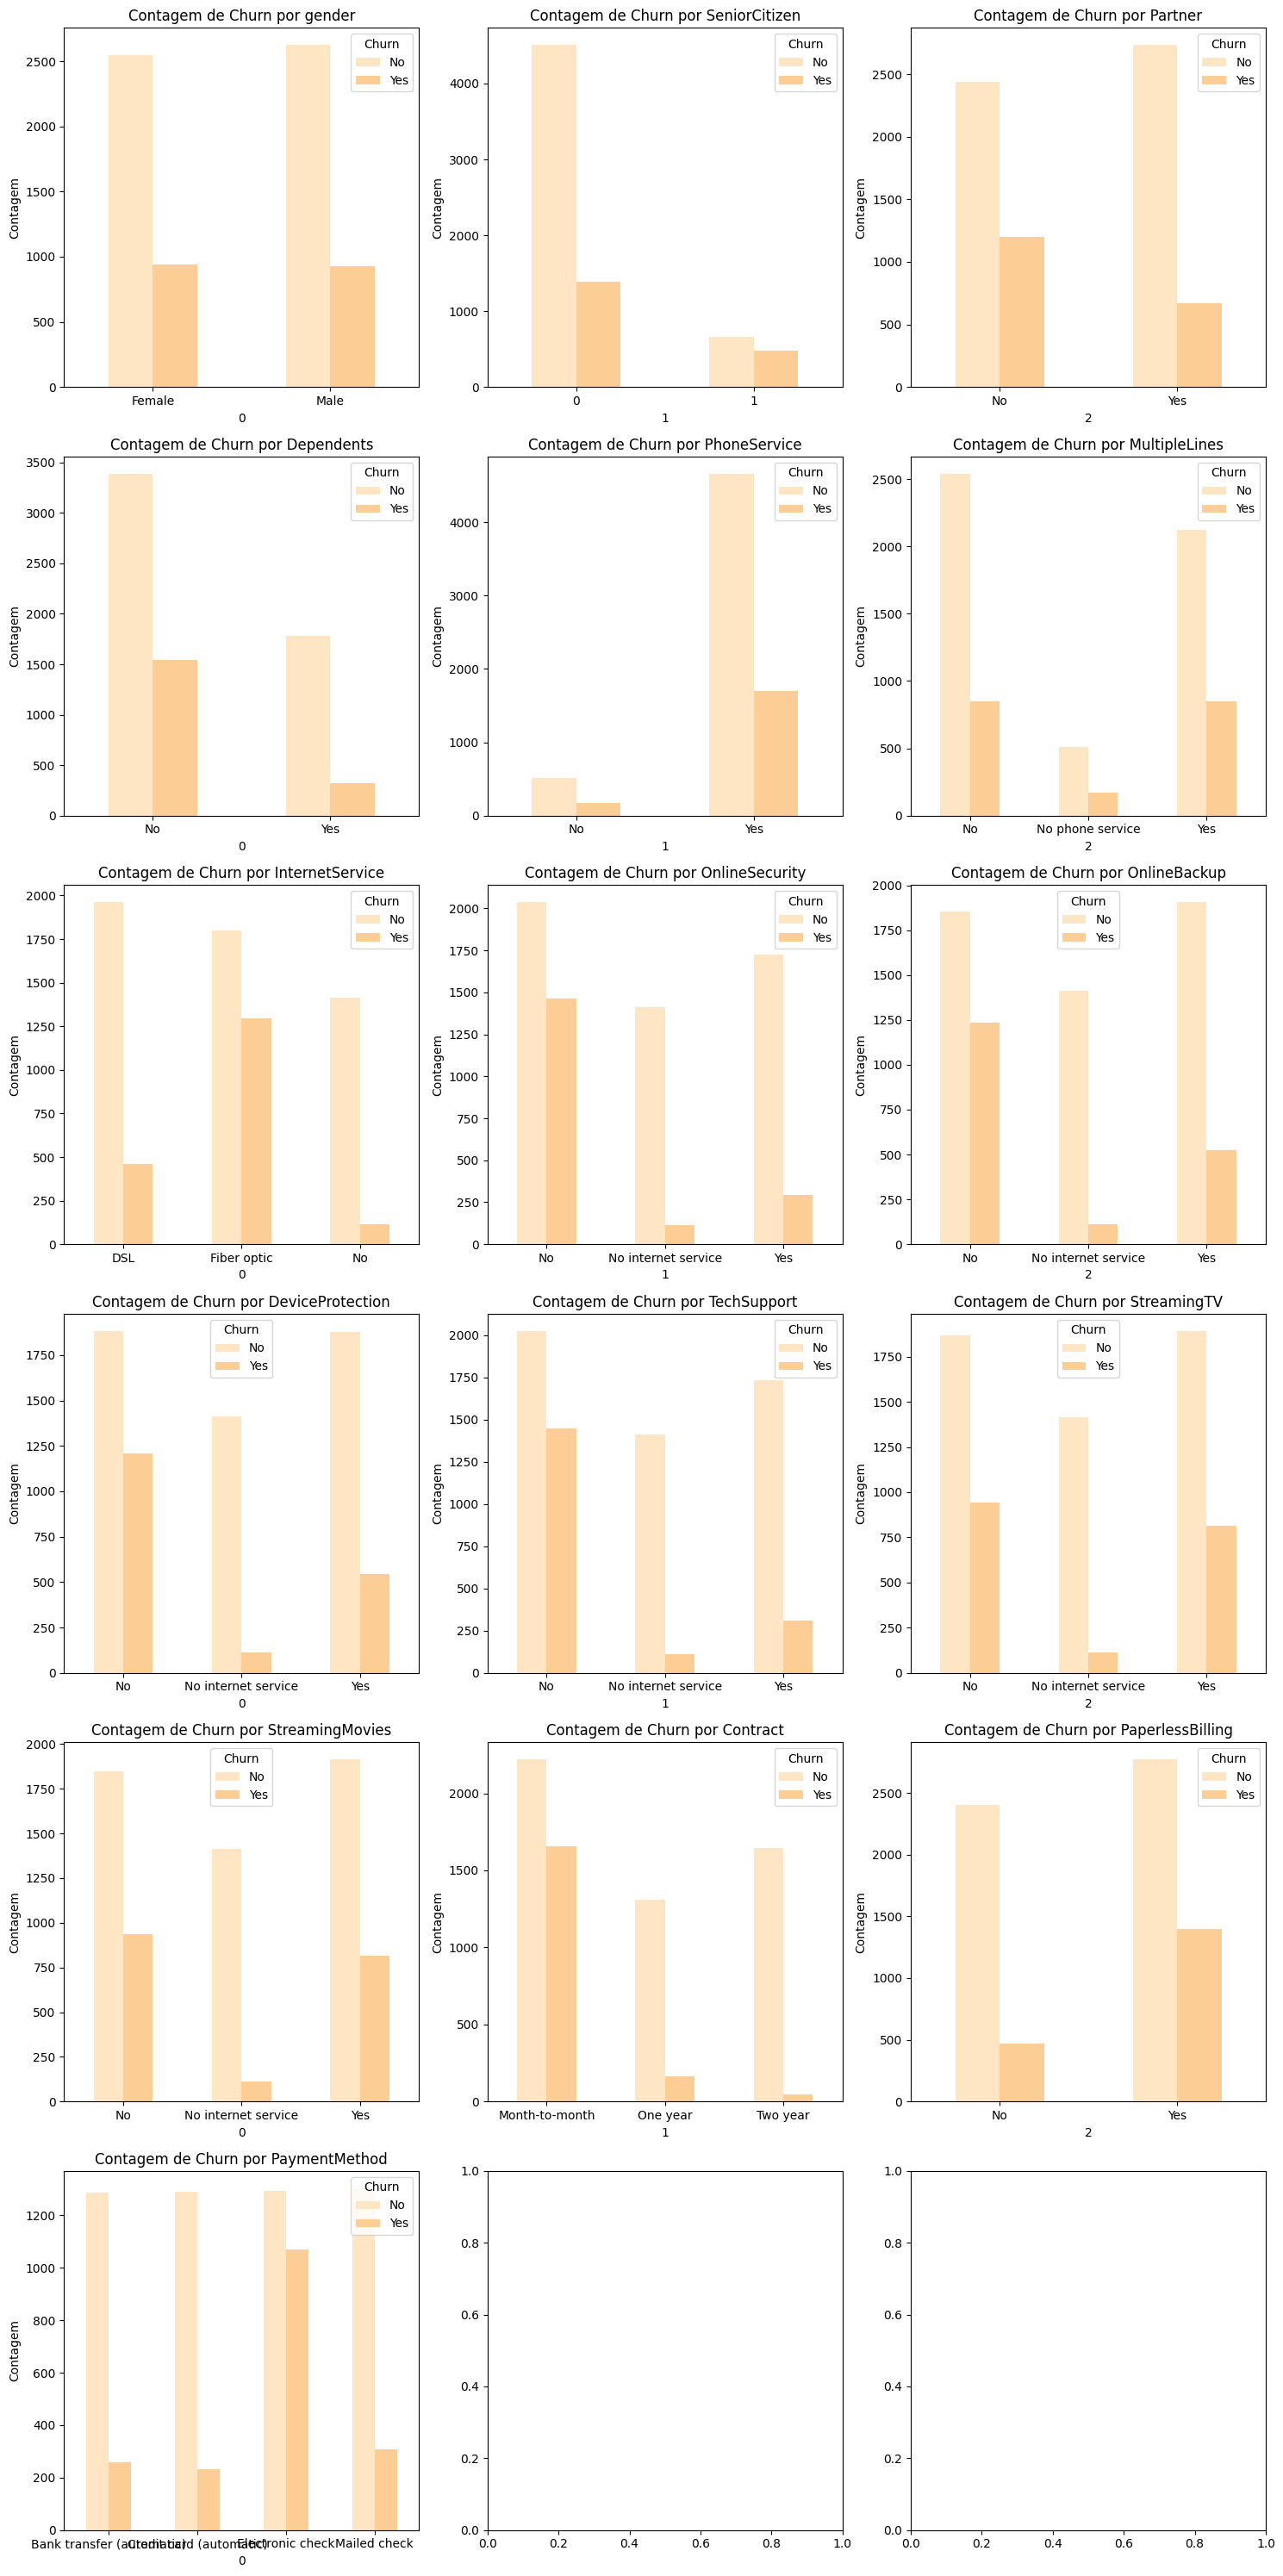

In [26]:
num_colunas_por_linha = 3
num_linhas = (len(cats) + num_colunas_por_linha - 1) // num_colunas_por_linha

# Criar subplots
fig, axes = plt.subplots(num_linhas, num_colunas_por_linha, figsize=(15, 5 * num_linhas))
fig.subplots_adjust(hspace=0.5)

# Define a paleta do Seaborn
sns.set_palette('OrRd')

# Iterar pelas colunas categóricas e criar os gráficos
for i, col in enumerate(cats):
    row = i // num_colunas_por_linha
    col = i % num_colunas_por_linha
    contingency_table = pd.crosstab(dados[cats[i]], dados['Churn'])
    ax = contingency_table.plot(kind='bar', ax=axes[row, col])
    ax.set_title(f'Contagem de Churn por {cats[i]}')
    ax.set_xlabel(col)
    ax.set_ylabel('Contagem')
    ax.legend(title='Churn')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Ajustar layout
plt.tight_layout()

# Exibir os gráficos
plt.show()

 - Conclusão sumária: 
        Variável Gender aparentemente não possui relevância para a variável target - Por não ter relevância, será excluída na egenhearia de atributos
        

#### Verificando as proporcionalidades de cada variável

Loop em cada variável com intuito de verificar variáveis com maiores impactos e forte relação com 'Churn'

In [98]:
# For para imprimir todos os DF com o campo (%)
for i in cats:
    group1 = dados.groupby(i)['Churn'].value_counts().reset_index()
    group2 = dados.groupby(['Churn'])['Churn'].value_counts().reset_index()
    group3 = group1.merge(group2, on = 'Churn')
    group3['Porcentagem (%)'] = round(group3['count_x'] / group3['count_y'] * 100, 2)
    group3.rename(columns = {'count_x': 'Total/Cat', 'count_y':'Total Geral'}, inplace = True)
    print(f"\n\t\tPanorama variável {i}")
    print(group3)


		Panorama variável gender
   gender Churn  Total/Cat  Total Geral  Porcentagem (%)
0  Female    No       2549         5174            49.27
1    Male    No       2625         5174            50.73
2  Female   Yes        939         1869            50.24
3    Male   Yes        930         1869            49.76

		Panorama variável SeniorCitizen
  SeniorCitizen Churn  Total/Cat  Total Geral  Porcentagem (%)
0             0    No       4508         5174            87.13
1             1    No        666         5174            12.87
2             0   Yes       1393         1869            74.53
3             1   Yes        476         1869            25.47

		Panorama variável Partner
  Partner Churn  Total/Cat  Total Geral  Porcentagem (%)
0      No    No       2441         5174            47.18
1     Yes    No       2733         5174            52.82
2      No   Yes       1200         1869            64.21
3     Yes   Yes        669         1869            35.79

		Panorama variável De

# Engenharia de Atributos